Are there any negative values in heatmap_data? False


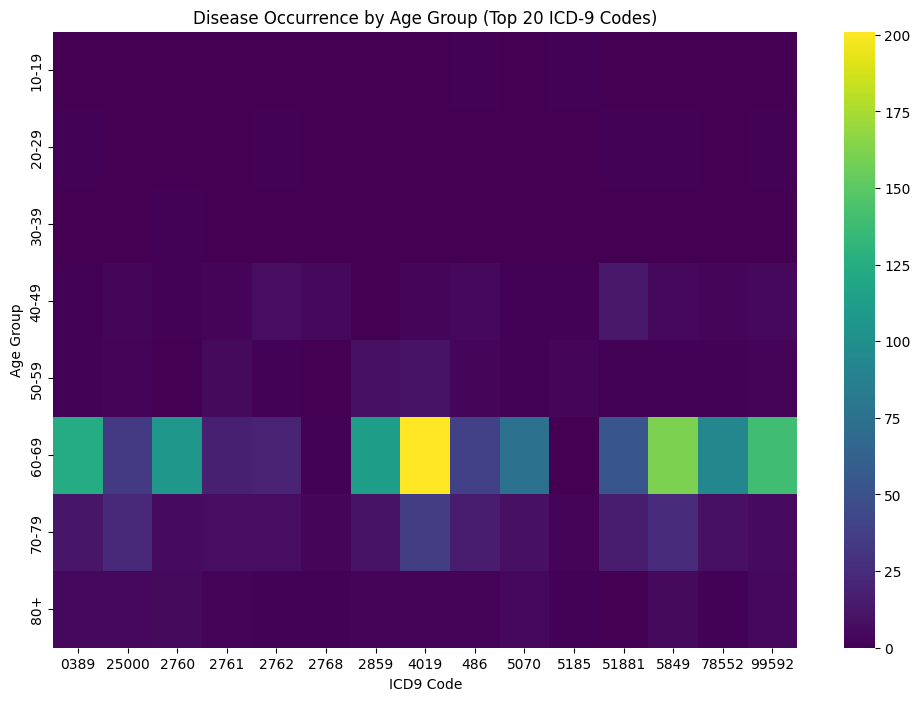

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sqlalchemy import create_engine
from datetime import datetime

# Load data into DataFrames
patients_df = pd.read_csv('./mimic-iii-clinical-database-demo-1.4/PATIENTS.csv')
diagnoses_df = pd.read_csv('./mimic-iii-clinical-database-demo-1.4/DIAGNOSES_ICD.csv')
admissions_df = pd.read_csv('./mimic-iii-clinical-database-demo-1.4/ADMISSIONS.csv')


merged_data = pd.merge(patients_df[['subject_id', 'dob']], admissions_df[['subject_id', 'admittime']], on='subject_id', how='inner')

merged_data['dob'] = pd.to_datetime(merged_data['dob'])
merged_data['admittime'] = pd.to_datetime(merged_data['admittime'])


def calculate_age(admittime, dob):
    # Convert Timestamps to datetime objects
    dob = dob.to_pydatetime()
    admittime = admittime.to_pydatetime()

    # Calculate total days from birth to ICU admission
    total_days = (admittime - dob).total_seconds() / (60 * 60 * 24)
    # Convert days to years accounting for leap years (365.242 days per year)
    age_years = total_days / 365.242
    return round(age_years, 4)

merged_data['age'] = merged_data.apply(lambda row: calculate_age(row['admittime'], row['dob']), axis=1)


age_threshold = 110
current_year = datetime.now().year
merged_data['age'] = merged_data.apply(lambda row: np.nan if pd.isna(row['age']) or (current_year - row['dob'].year) > age_threshold else row['age'], axis=1)

def categorize_age(age):
    if age < 20: return '10-19'
    # Add more categories as needed
    elif age < 30: return '20-29'
    elif age < 40: return '30-39'
    elif age < 50: return '40-49'
    elif age < 60: return '50-59'
    elif age < 70: return '60-69'
    elif age < 90: return '70-79'
    else: return '80+'  # Adjust according to your data

merged_data['age_group'] = merged_data['age'].apply(categorize_age)

# Merge age information with diagnoses data
final_df = pd.merge(merged_data[['subject_id', 'age_group']], diagnoses_df[['subject_id', 'icd9_code']], on='subject_id', how='inner')
# Group by age group and ICD code, then count occurrences in final_df

grouped_data = final_df.groupby(['age_group', 'icd9_code']).size().reset_index(name='count')

# Select top N ICD-9 codes for analysis
top_icd_codes = grouped_data['icd9_code'].value_counts().head(15).index  # Top 20 codes
grouped_data_top = grouped_data[grouped_data['icd9_code'].isin(top_icd_codes)]

# Pivot for heatmap using the top ICD-9 codes
heatmap_data = grouped_data_top.pivot_table(index='age_group', columns='icd9_code', values='count', fill_value=0)

# Check if there are any negative values in heatmap_data
has_negative_values = heatmap_data.lt(0).any().any()
print("Are there any negative values in heatmap_data?", has_negative_values)


# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=False, cmap='viridis', vmin=0, vmax=heatmap_data.max().max())
plt.title('Disease Occurrence by Age Group (Top 20 ICD-9 Codes)')
plt.xlabel('ICD9 Code')
plt.ylabel('Age Group')
plt.show()

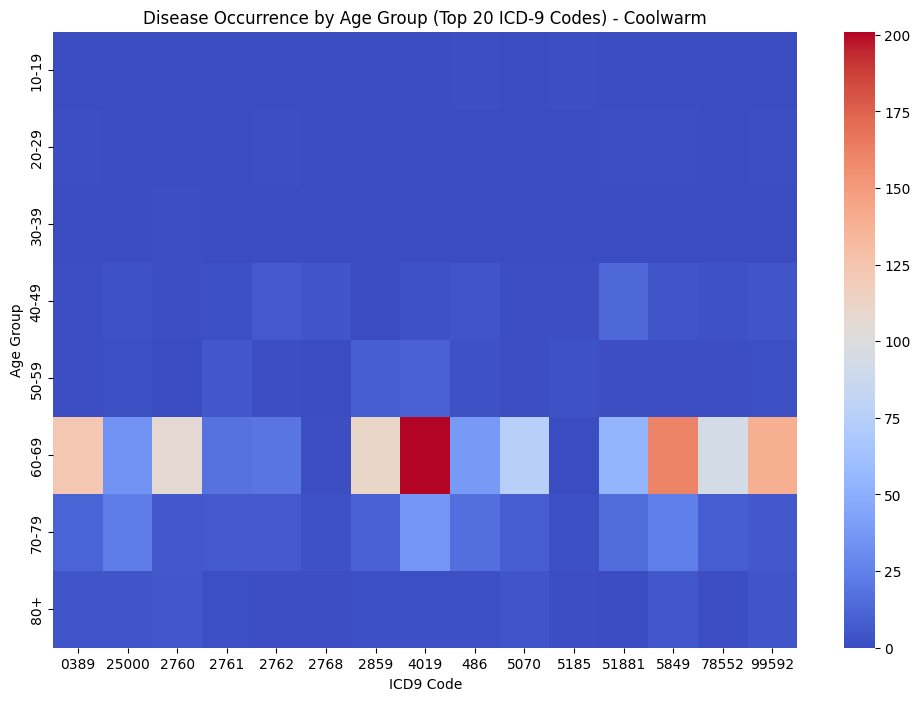

In [32]:
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=False, cmap='coolwarm', vmin=0, vmax=heatmap_data.max().max())
plt.title('Disease Occurrence by Age Group (Top 20 ICD-9 Codes) - Coolwarm')
plt.xlabel('ICD9 Code')
plt.ylabel('Age Group')
plt.show()

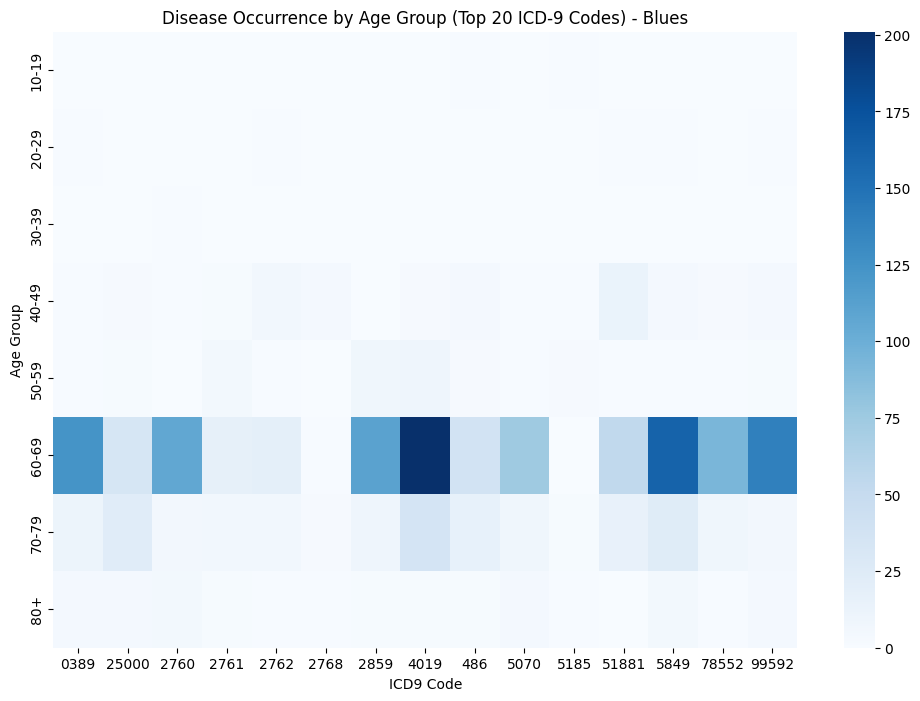

In [33]:
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=False, cmap='Blues', vmin=0, vmax=heatmap_data.max().max())
plt.title('Disease Occurrence by Age Group (Top 20 ICD-9 Codes) - Blues')
plt.xlabel('ICD9 Code')
plt.ylabel('Age Group')
plt.show()

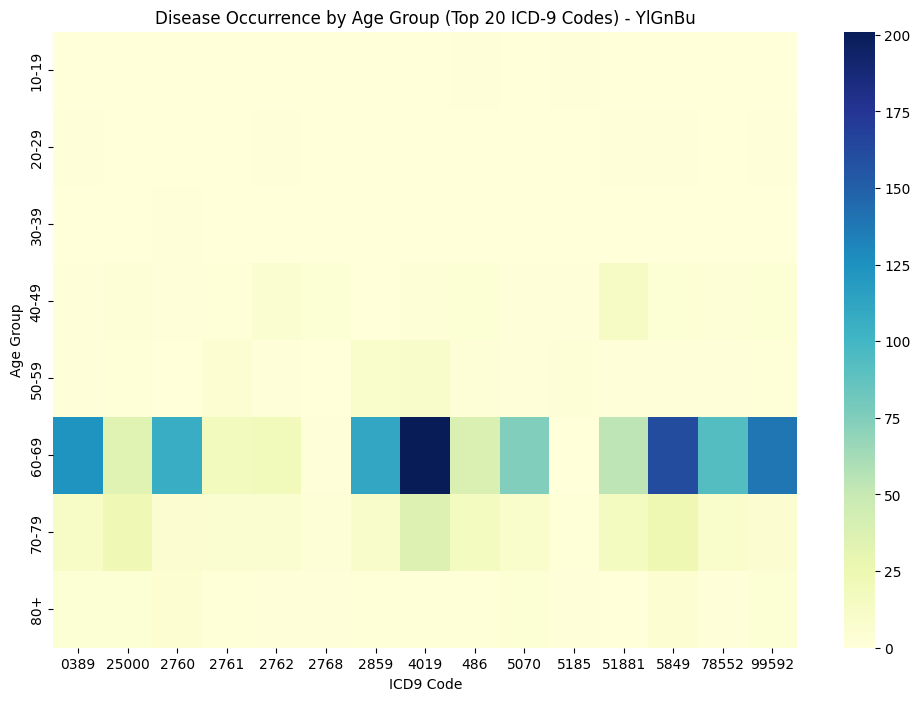

In [34]:
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=False, cmap='YlGnBu', vmin=0, vmax=heatmap_data.max().max())
plt.title('Disease Occurrence by Age Group (Top 20 ICD-9 Codes) - YlGnBu')
plt.xlabel('ICD9 Code')
plt.ylabel('Age Group')
plt.show()

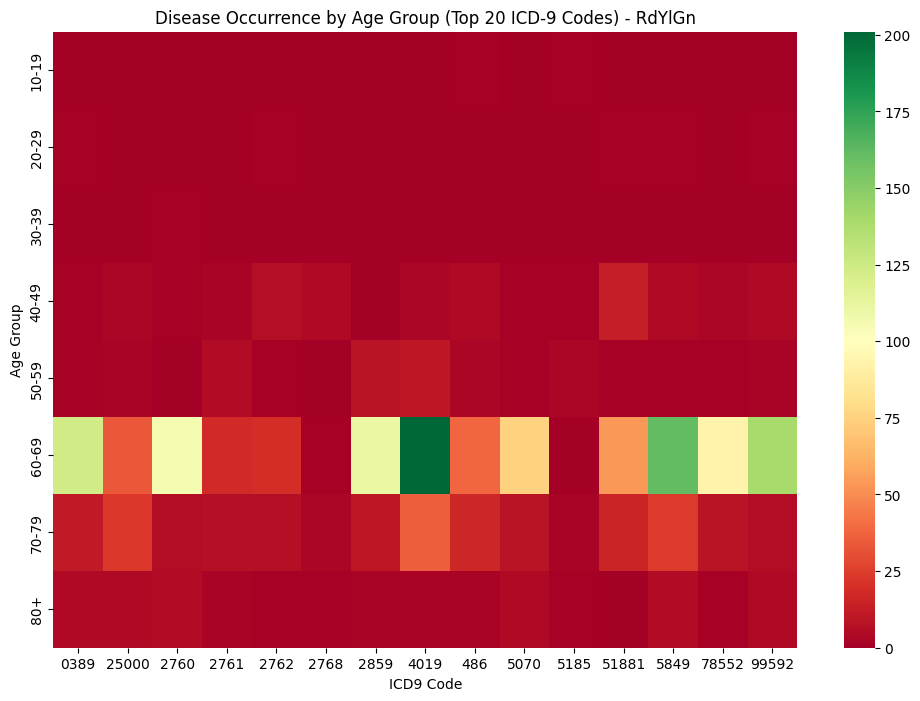

In [35]:
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=False, cmap='RdYlGn', vmin=0, vmax=heatmap_data.max().max())
plt.title('Disease Occurrence by Age Group (Top 20 ICD-9 Codes) - RdYlGn')
plt.xlabel('ICD9 Code')
plt.ylabel('Age Group')
plt.show()